In [334]:
#Set up environment by importing packages needed.
from pathlib import Path
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [335]:
# directory for the data
dir = Path(r"C:\Users\1kevi\OneDrive\Documents\Case Studies\Cyclistic\data")

In [336]:
# Create a list of filepaths for the quarterly data
files = [file for file in dir.iterdir()]
files

[WindowsPath('C:/Users/1kevi/OneDrive/Documents/Case Studies/Cyclistic/data/Divvy_Trips_2019_Q1.csv'),
 WindowsPath('C:/Users/1kevi/OneDrive/Documents/Case Studies/Cyclistic/data/Divvy_Trips_2019_Q2.csv'),
 WindowsPath('C:/Users/1kevi/OneDrive/Documents/Case Studies/Cyclistic/data/Divvy_Trips_2019_Q3.csv'),
 WindowsPath('C:/Users/1kevi/OneDrive/Documents/Case Studies/Cyclistic/data/Divvy_Trips_2019_Q4.csv')]

In [337]:
# Read in each quarter of data for divvy trips
q1 = pd.read_csv(files[0], low_memory=False)
q2 = pd.read_csv(files[1], low_memory=False)
q3 = pd.read_csv(files[2], low_memory=False)
q4 = pd.read_csv(files[3], low_memory=False)


In [338]:
# Preview the data for each quarter

# q1.head()
q2.head()
# q3.head()
# q4.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [339]:
# Rename all columns from q2 to match the columns of q1 and check
q2.columns = q1.columns
q2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [340]:
# combine all quarters of data and check
fy_data = pd.concat([q1,q2,q3,q4])
fy_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [341]:
# Export the full year of 2019 data to a csv
fy_data.to_csv(f"{dir}\\divvy_trips_2019.csv", index=False)

In [342]:
#Check datatypes to make sure they are correct
fy_data.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [343]:
# check for duplicate values
sum(fy_data.duplicated())

0

In [344]:
#Convert date columns to datetime type
date_columns = ["start_time", "end_time"]

for column in date_columns:
    fy_data[column] = pd.to_datetime(fy_data[column])

#convert birthyear to integer, fill lines that do not have birth year with 0.
fy_data["birthyear"] = fy_data["birthyear"].fillna(0).astype("int")

# Convert all data in the 'tripduration' column to strings
fy_data["tripduration"] = fy_data["tripduration"].astype(str)

# Replace commas and convert to float
fy_data["tripduration"] = fy_data["tripduration"].str.replace(",", "").astype(float)

fy_data.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                float64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                     int64
dtype: object

In [345]:
# Get the date the ride was taken.
fy_data["date"] = pd.to_datetime(fy_data["start_time"]).dt.date

# Get the month the ride was taken.
fy_data["month"] = pd.to_datetime(fy_data["start_time"]).dt.month

# Get the day the ride was taken.
fy_data["day"] = pd.to_datetime(fy_data["start_time"]).dt.day_of_week

# Get the age the rider was when the ride was taken.
fy_data["age"] = 2019 - fy_data["birthyear"]

# Check the dataframe
fy_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,date,month,day,age
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,2019-01-01,1,1,30
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,2019-01-01,1,1,29
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,2019-01-01,1,1,25
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783.0,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,2019-01-01,1,1,26
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,2019-01-01,1,1,25


In [346]:
# Filter to only the columns we will use
columns = ["date", "month", "day", "usertype", "gender", "age", "tripduration"]

filtered_fy_data = fy_data[columns]

filtered_fy_data.head()

,date,month,day,usertype,gender,age,tripduration
0,2019-01-01,1,1,Subscriber,Male,30,390.0
1,2019-01-01,1,1,Subscriber,Female,29,441.0
2,2019-01-01,1,1,Subscriber,Female,25,829.0
3,2019-01-01,1,1,Subscriber,Male,26,1783.0
4,2019-01-01,1,1,Subscriber,Male,25,364.0


In [347]:
# Convert trip duration to minutes from seconds
filtered_fy_data["tripduration"] = round(fy_data["tripduration"] / 60, 2)

# Check the dataframe
filtered_fy_data.head()



C:\Users\1kevi\AppData\Local\Temp\ipykernel_900\4291474349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fy_data["tripduration"] = round(fy_data["tripduration"] / 60, 2)


,date,month,day,usertype,gender,age,tripduration
0,2019-01-01,1,1,Subscriber,Male,30,6.50
1,2019-01-01,1,1,Subscriber,Female,29,7.35
2,2019-01-01,1,1,Subscriber,Female,25,13.82
3,2019-01-01,1,1,Subscriber,Male,26,29.72
4,2019-01-01,1,1,Subscriber,Male,25,6.07


In [367]:
# check for null values
filtered_fy_data.isna().sum()

date            0
month           0
day             0
usertype        0
gender          0
age             0
tripduration    0
dtype: int64

In [349]:
# fill null values with NA
filtered_fy_data["gender"] = filtered_fy_data["gender"].fillna("NA")

# check dataframe
filtered_fy_data.head()

C:\Users\1kevi\AppData\Local\Temp\ipykernel_900\4039254015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fy_data["gender"] = filtered_fy_data["gender"].fillna("NA")


,date,month,day,usertype,gender,age,tripduration
0,2019-01-01,1,1,Subscriber,Male,30,6.50
1,2019-01-01,1,1,Subscriber,Female,29,7.35
2,2019-01-01,1,1,Subscriber,Female,25,13.82
3,2019-01-01,1,1,Subscriber,Male,26,29.72
4,2019-01-01,1,1,Subscriber,Male,25,6.07


In [350]:
#Get total count of subscribers and subomers
subscriber_count = filtered_fy_data.groupby("usertype")["date"].count()
subscriber_count

usertype
Customer       880637
Subscriber    2937367
Name: date, dtype: int64

In [352]:
#Get total proportion of subscribers and customers
subscriber_proportion = round(filtered_fy_data.groupby("usertype").size() / len(filtered_fy_data),2)
subscriber_proportion



usertype
Customer      0.23
Subscriber    0.77
dtype: float64

In [353]:
# calculate summary statistics for trip duration
trip_duration_summary = round(filtered_fy_data["tripduration"].describe(),2)
trip_duration_summary

count    3818004.00
mean          24.17
std          497.57
min            1.02
25%            6.85
50%           11.82
75%           21.38
max       177140.00
Name: tripduration, dtype: float64

In [354]:
# Filter out blank gender responses and check the proportion of our demographic at the store
gender_comparison = filtered_fy_data[filtered_fy_data["gender"] != "NA"]
gender_proportion = round(gender_comparison["gender"].value_counts(normalize=True),2)
gender_proportion

gender
Male      0.74
Female    0.26
Name: proportion, dtype: float64

In [355]:
# check the proportion of gender that are subscribed
gender_proportion_subscribed = round(gender_comparison.groupby("gender")["usertype"].value_counts(normalize=True),2)
gender_proportion_subscribed

gender  usertype  
Female  Subscriber    0.85
        Customer      0.15
Male    Subscriber    0.91
        Customer      0.09
Name: proportion, dtype: float64

In [392]:
#compare trip durations between subscribers and customers.
trip_duration_comparison = round(filtered_fy_data.groupby("usertype")["tripduration"].agg(["mean","count","std"]),2)
trip_duration_comparison

,mean,count,std
usertype,,,
Customer,57.01,880637,927.07
Subscriber,14.32,2937367,252.40


In [396]:
# Filter to customer data, and filter out outliers
cust_df = filtered_fy_data[filtered_fy_data["usertype"]=="Customer"]
cust_td = cust_df["tripduration"]
cust_td_mean = cust_td.mean()
cust_td_q1 = cust_td.quantile(.25)
cust_td_q3 = cust_td.quantile(.75)
cust_td_IQR = cust_td_q3-cust_td_q1
cust_lower_bound = cust_td_q1 - (1.5 * cust_td_IQR)
cust_upper_bound = cust_td_q3 + (1.5 * cust_td_IQR)

cust_no_outliers = cust_df[(cust_df["tripduration"]>=cust_lower_bound) & (cust_df["tripduration"]<=cust_upper_bound)]
cust_no_outliers

,date,month,day,usertype,gender,age,tripduration
13,2019-01-01,1,1,Customer,Female,29,9.37
17,2019-01-01,1,1,Customer,Female,29,22.60
19,2019-01-01,1,1,Customer,NA,2019,38.88
21,2019-01-01,1,1,Customer,NA,2019,38.35
41,2019-01-01,1,1,Customer,Male,31,19.12
...,...,...,...,...,...,...,...
704023,2019-12-31,12,1,Customer,Male,31,90.25
704040,2019-12-31,12,1,Customer,NA,2019,25.67
704041,2019-12-31,12,1,Customer,NA,2019,32.12
704042,2019-12-31,12,1,Customer,NA,2019,32.27


In [399]:
#compare trip durations for customers without outliers
cust_td_info = round(cust_no_outliers.groupby("usertype")["tripduration"].agg(["mean","count","std"]),2)
cust_td_info

,mean,count,std
usertype,,,
Customer,28.85,808786,19.32


In [401]:
# get the average trip duration for each day for customers
daily_cust_td = cust_no_outliers.groupby(["usertype", "date"]).agg({"tripduration":"mean"}).reset_index()
daily_cust_td

,usertype,date,tripduration
0,Customer,2019-01-01,25.828230
1,Customer,2019-01-02,18.642520
2,Customer,2019-01-03,27.953049
3,Customer,2019-01-04,28.191318
4,Customer,2019-01-05,32.159037
...,...,...,...
360,Customer,2019-12-27,25.456762
361,Customer,2019-12-28,27.987394
362,Customer,2019-12-29,30.562464
363,Customer,2019-12-30,24.557044


In [404]:
#compare trip durations between customers by month.
monthly_cust_td = round(cust_no_outliers.groupby(["usertype", "month"])["tripduration"].agg({"mean", "count", "std"}),2).reset_index()

#Sort by month
monthly_cust_td = monthly_cust_td.sort_values(["usertype","month"])

monthly_cust_td

,usertype,month,std,count,mean
0,Customer,1,18.69,4328,25.79
1,Customer,2,16.26,2502,21.45
2,Customer,3,18.36,14933,27.53
3,Customer,4,20.01,43890,31.25
4,Customer,5,19.90,74527,31.00
5,Customer,6,19.56,119317,29.96
6,Customer,7,19.53,159884,29.84
7,Customer,8,19.23,170468,29.09
8,Customer,9,18.90,119177,27.60
9,Customer,10,18.43,66507,25.63


In [406]:
#compare trip durations between customers by day.
cust_day_comparison = round(cust_no_outliers.groupby(["usertype", "day"])["tripduration"].agg({"mean", "count", "std"}),0).reset_index()
cust_day_comparison = cust_day_comparison.sort_values(["usertype", "day"])
cust_day_comparison

,usertype,day,std,count,mean
0,Customer,0,20.0,93129,29.0
1,Customer,1,19.0,81999,27.0
2,Customer,2,19.0,83292,27.0
3,Customer,3,19.0,93813,27.0
4,Customer,4,19.0,111782,28.0
5,Customer,5,20.0,189776,31.0
6,Customer,6,19.0,154995,30.0


In [397]:
# Filter to Subscriber data, and filter out outliers
sub_df = filtered_fy_data[filtered_fy_data["usertype"]=="Subscriber"]
sub_td = sub_df["tripduration"]

sub_td_mean = sub_td.mean()
sub_td_q1 = sub_td.quantile(.25)
sub_td_q3 = sub_td.quantile(.75)

sub_td_IQR = sub_td_q3-sub_td_q1

sub_lower_bound = sub_td_q1 - (1.5 * sub_td_IQR)
sub_upper_bound = sub_td_q3 + (1.5 * sub_td_IQR)

sub_no_outliers = sub_df[(sub_df["tripduration"]>=sub_lower_bound) & (sub_df["tripduration"]<=sub_upper_bound)]
sub_no_outliers

,date,month,day,usertype,gender,age,tripduration
0,2019-01-01,1,1,Subscriber,Male,30,6.50
1,2019-01-01,1,1,Subscriber,Female,29,7.35
2,2019-01-01,1,1,Subscriber,Female,25,13.82
3,2019-01-01,1,1,Subscriber,Male,26,29.72
4,2019-01-01,1,1,Subscriber,Male,25,6.07
...,...,...,...,...,...,...,...
704049,2019-12-31,12,1,Subscriber,Male,38,19.53
704050,2019-12-31,12,1,Subscriber,Male,27,25.55
704051,2019-12-31,12,1,Subscriber,Male,52,8.67
704052,2019-12-31,12,1,Subscriber,Female,49,8.57


In [400]:
#compare trip durations for customers without outliers
sub_td_info = round(sub_no_outliers.groupby("usertype")["tripduration"].agg(["mean","count","std"]),2)
sub_td_info

,mean,count,std
usertype,,,
Subscriber,11.08,2791755,6.73


In [407]:
# get the average trip duration for each day for subscribers
daily_sub_td = sub_no_outliers.groupby(["usertype", "date"]).agg({"tripduration":"mean"}).reset_index()
daily_sub_td

,usertype,date,tripduration
0,Subscriber,2019-01-01,9.808953
1,Subscriber,2019-01-02,9.444078
2,Subscriber,2019-01-03,9.751593
3,Subscriber,2019-01-04,10.082840
4,Subscriber,2019-01-05,11.433093
...,...,...,...
360,Subscriber,2019-12-27,9.758301
361,Subscriber,2019-12-28,10.093107
362,Subscriber,2019-12-29,10.928507
363,Subscriber,2019-12-30,9.176024


In [408]:
#compare trip durations between subscribers by month.
monthly_sub_td = round(sub_no_outliers.groupby(["usertype", "month"])["tripduration"].agg({"mean", "count", "std"}),2).reset_index()

#Sort by month
monthly_sub_td = monthly_sub_td.sort_values(["usertype","month"])

monthly_sub_td

,usertype,month,std,count,mean
0,Subscriber,1,6.04,95480,9.71
1,Subscriber,2,6.00,90787,9.54
2,Subscriber,3,6.28,144649,9.95
3,Subscriber,4,6.61,207709,10.75
4,Subscriber,5,6.81,270757,11.24
5,Subscriber,6,6.92,324319,11.78
6,Subscriber,7,7.00,356630,12.04
7,Subscriber,8,6.92,379021,11.82
8,Subscriber,9,6.81,345055,11.40
9,Subscriber,10,6.50,288967,10.57


In [409]:
#compare trip durations between subscribers by day.
sub_day_comparison = round(sub_no_outliers.groupby(["usertype", "day"])["tripduration"].agg({"mean", "count", "std"}),0).reset_index()
sub_day_comparison = sub_day_comparison.sort_values(["usertype", "day"])
sub_day_comparison

,usertype,day,std,count,mean
0,Subscriber,0,7.0,438128,11.0
1,Subscriber,1,7.0,475267,11.0
2,Subscriber,2,7.0,472586,11.0
3,Subscriber,3,7.0,465021,11.0
4,Subscriber,4,7.0,436497,11.0
5,Subscriber,5,7.0,266248,12.0
6,Subscriber,6,7.0,238008,12.0


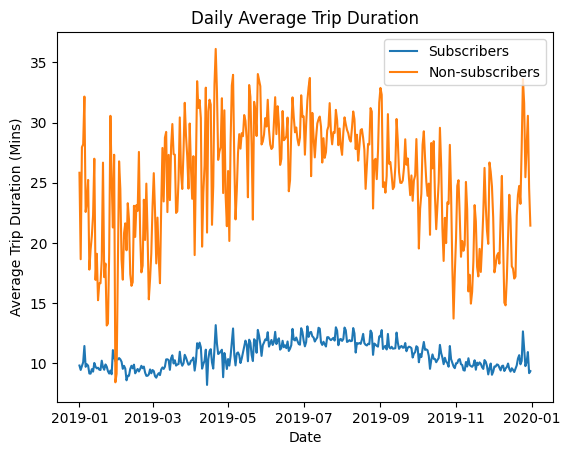

In [427]:
# Set the coordinates for the plots
x = daily_cust_td["date"]
y1 = daily_sub_td["tripduration"]
y2 = daily_cust_td["tripduration"]

# graph the lines for subscribers and custumers
plt.plot(x,y1,label="Subscribers")
plt.plot(x,y2,label="Non-subscribers")

# label the axes
plt.xlabel("Date")
plt.ylabel("Average Trip Duration (Mins)")

# give title, add legend, and show the plot
plt.title("Daily Average Trip Duration")
plt.legend()
plt.show()

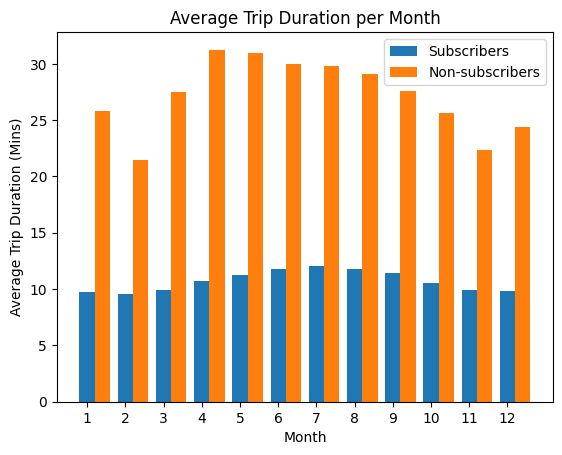

In [426]:
# Set the coordinates for the plots
x = monthly_cust_td["month"]
y1 = monthly_sub_td["mean"]
y2 = monthly_cust_td["mean"]

# graph the lines for subscribers and custumers
plt.bar(x,y1,label="Subscribers", width=.4)
plt.bar(x+.4,y2,label="Non-subscribers", width=.4)

# label the axes
plt.xlabel("Month")
plt.ylabel("Average Trip Duration (Mins)")

plt.xticks(x)

# give title, add legend, and show the plot
plt.title("Average Trip Duration per Month")
plt.legend()
plt.show()

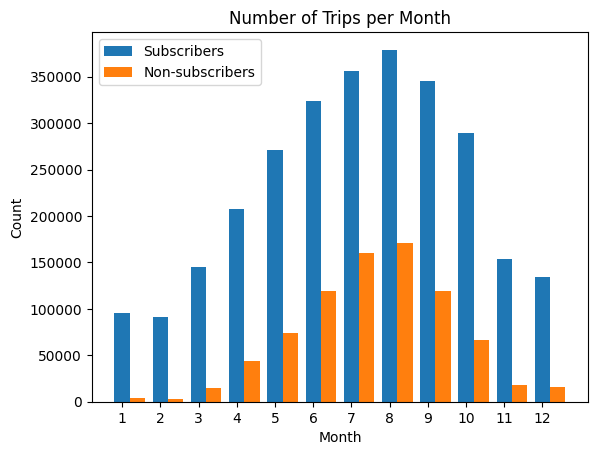

In [425]:
# Set the coordinates for the plots
x = monthly_cust_td["month"]
y1 = monthly_sub_td["count"]
y2 = monthly_cust_td["count"]

# graph the lines for subscribers and custumers
plt.bar(x,y1,label="Subscribers", width=.4)
plt.bar(x+.4,y2,label="Non-subscribers", width=.4)

# label the axes
plt.xlabel("Month")
plt.ylabel("Count")

plt.xticks(x)

# give title, add legend, and show the plot
plt.title("Number of Trips per Month")
plt.legend()
plt.show()

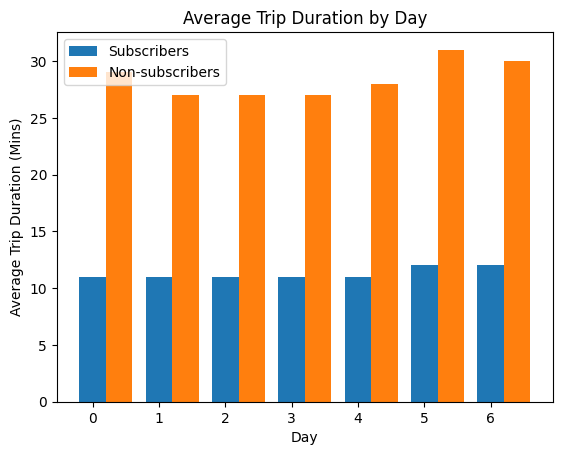

In [424]:
# Set the coordinates for the plots
x = cust_day_comparison["day"]
y1 = sub_day_comparison["mean"]
y2 = cust_day_comparison["mean"]

# graph the lines for subscribers and custumers
plt.bar(x,y1,label="Subscribers",width=.4)
plt.bar(x+.4,y2,label="Non-subscribers",width=.4)

# label the axes
plt.xlabel("Day")
plt.ylabel("Average Trip Duration (Mins)")

# give title, add legend, and show the plot
plt.title("Average Trip Duration by Day")
plt.legend()
plt.show()

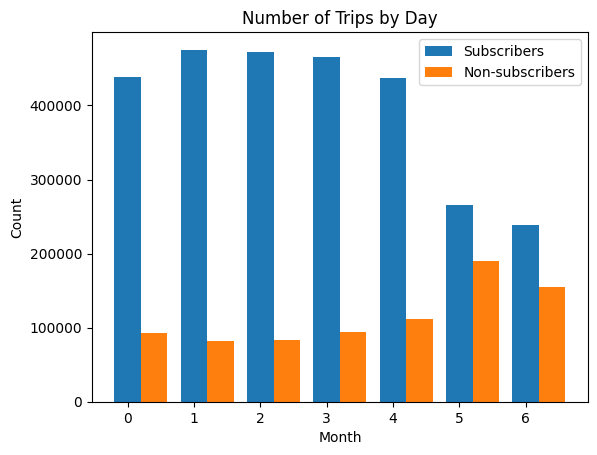

In [430]:
# Set the coordinates for the plots
x = cust_day_comparison["day"]
y1 = sub_day_comparison["count"]
y2 = cust_day_comparison["count"]

# set the max value for the Y axis
# plt.ylim(top=200)

# graph the lines for subscribers and custumers
plt.bar(x,y1,label="Subscribers",width=.4)
plt.bar(x+.4,y2,label="Non-subscribers",width=.4)

# label the axes
plt.xlabel("Month")
plt.ylabel("Count")

# give title, add legend, and show the plot
plt.title("Number of Trips by Day")
plt.legend()
plt.show()